In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

In [2]:
imdb = keras.datasets.imdb

In [5]:
NUM_WORDS = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=NUM_WORDS)

17465344/17464789 [==============================] - 288s 16us/step


In [8]:
def multihot_encode(sequences, num_words):
    vectorized_data = np.zeros((len(sequences), num_words))
    for i, sequence in enumerate(sequences):
        vectorized_data[i, sequence] = 1.
    return vectorized_data

In [9]:
train_data = multihot_encode(train_data, NUM_WORDS)
test_data = multihot_encode(test_data, NUM_WORDS)

In [11]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS, )),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['acc'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [12]:
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
]

In [13]:
baseline_history = baseline_model.fit(train_data, 
                                      train_labels,
                                      epochs=100,
                                      batch_size=512,
                                      callbacks=callbacks,
                                      validation_data=(test_data, test_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/100
25000/25000 [==============================] - 11s 424us/step - loss: 0.5016 - acc: 0.7750 - val_loss: 0.3454 - val_acc: 0.8758
Epoch 2/100
25000/25000 [==============================] - 9s 358us/step - loss: 0.2513 - acc: 0.9140 - val_loss: 0.2852 - val_acc: 0.8869
Epoch 3/100
25000/25000 [==============================] - 11s 420us/step - loss: 0.1791 - acc: 0.9390 - val_loss: 0.2941 - val_acc: 0.8836
Epoch 4/100
25000/25000 [==============================] - 12s 475us/step - loss: 0.1411 - acc: 0.9530 - val_loss: 0.3240 - val_acc: 0.8780
Epoch 5/100
25000/25000 [==============================] - 9s 340us/step - loss: 0.1166 - acc: 0.9615 - val_loss: 0.3585 - val_acc: 0.8709
Epoch 6/100
25000/25000 [==============================] - 8s 301us/step - loss: 0.0948 - acc: 0.9712 - val_loss: 0.3914 - val_acc: 0.8682
Epoch 7/100
25000/25000 [==============================] - 8s 321us/step - loss: 0.0775 - acc: 0.9785 - val_loss:

In [14]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS, )),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['acc'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [16]:
smaller_history = smaller_model.fit(train_data, 
                                    train_labels,
                                    epochs=100,
                                    batch_size=512,
                                    callbacks=callbacks,
                                    validation_data=(test_data, test_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/100
25000/25000 [==============================] - 8s 311us/step - loss: 0.6206 - acc: 0.6405 - val_loss: 0.5578 - val_acc: 0.7370
Epoch 2/100
25000/25000 [==============================] - 7s 282us/step - loss: 0.4983 - acc: 0.8269 - val_loss: 0.4761 - val_acc: 0.8502
Epoch 3/100
25000/25000 [==============================] - 7s 283us/step - loss: 0.4067 - acc: 0.9049 - val_loss: 0.4016 - val_acc: 0.8797
Epoch 4/100
25000/25000 [==============================] - 6s 251us/step - loss: 0.3137 - acc: 0.9290 - val_loss: 0.3316 - val_acc: 0.8857
Epoch 5/100
25000/25000 [==============================] - 7s 276us/step - loss: 0.2365 - acc: 0.9389 - val_loss: 0.2956 - val_acc: 0.8860
Epoch 6/100
25000/25000 [==============================] - 7s 277us/step - loss: 0.1904 - acc: 0.9455 - val_loss: 0.2862 - val_acc: 0.8856
Epoch 7/100
25000/25000 [==============================] - 7s 268us/step - loss: 0.1645 - acc: 0.9520 - val_loss: 0.

In [27]:
bigger_model = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS, )),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['acc'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [28]:
bigger_history = bigger_model.fit(train_data, 
                                      train_labels,
                                      epochs=100,
                                      batch_size=512,
                                      callbacks=callbacks,
                                      validation_data=(test_data, test_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/100
25000/25000 [==============================] - 26s 1ms/step - loss: 0.3501 - acc: 0.8474 - val_loss: 0.2942 - val_acc: 0.8798
Epoch 2/100
25000/25000 [==============================] - 23s 919us/step - loss: 0.1394 - acc: 0.9512 - val_loss: 0.3222 - val_acc: 0.8748
Epoch 3/100
25000/25000 [==============================] - 23s 907us/step - loss: 0.0414 - acc: 0.9880 - val_loss: 0.4416 - val_acc: 0.8701
Epoch 4/100
25000/25000 [==============================] - 23s 924us/step - loss: 0.0055 - acc: 0.9992 - val_loss: 0.6106 - val_acc: 0.8702
Epoch 5/100
25000/25000 [==============================] - 26s 1ms/step - loss: 6.1668e-04 - acc: 1.0000 - val_loss: 0.6920 - val_acc: 0.8711
Epoch 6/100
25000/25000 [==============================] - 32s 1ms/step - loss: 3.1793e-04 - acc: 1.0000 - val_loss: 0.7277 - val_acc: 0.8708
Epoch 7/100
25000/25000 [==============================] - 35s 1ms/step - loss: 7.8902e-04 - acc: 1.0000 - v

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

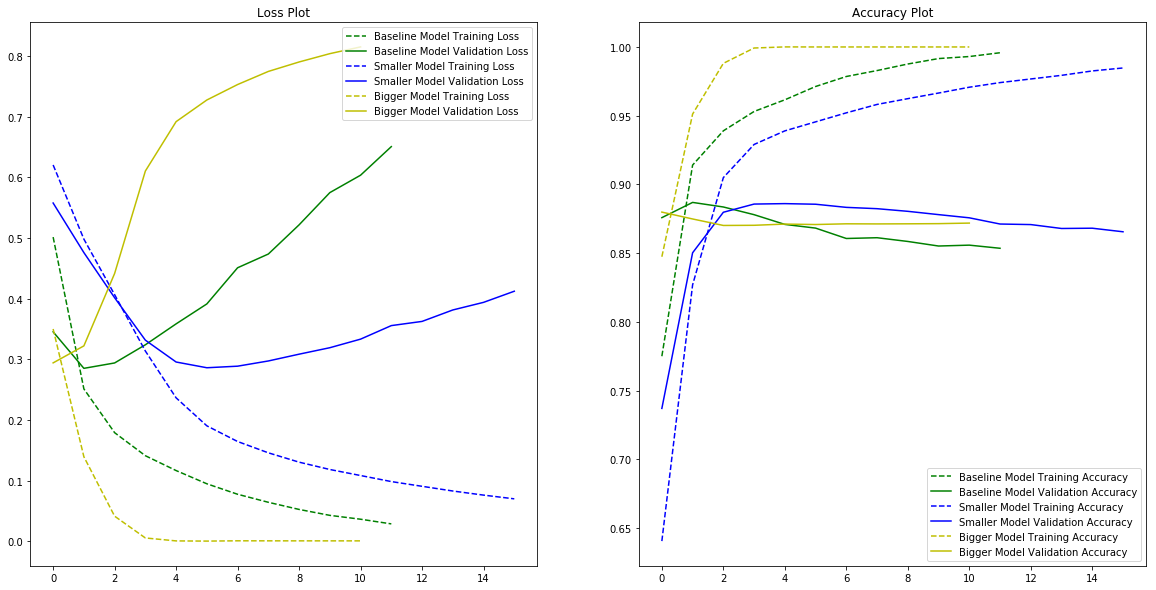

In [30]:
fig = plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.title('Loss Plot')

plt.plot(baseline_history.history['loss'], 'g--', label='Baseline Model Training Loss')
plt.plot(baseline_history.history['val_loss'], 'g', label='Baseline Model Validation Loss')

plt.plot(smaller_history.history['loss'], 'b--', label='Smaller Model Training Loss')
plt.plot(smaller_history.history['val_loss'], 'b', label='Smaller Model Validation Loss')

plt.plot(bigger_history.history['loss'], 'y--', label='Bigger Model Training Loss')
plt.plot(bigger_history.history['val_loss'], 'y', label='Bigger Model Validation Loss')

plt.legend()

plt.subplot(122)
plt.title('Accuracy Plot')

plt.plot(baseline_history.history['acc'], 'g--', label='Baseline Model Training Accuracy')
plt.plot(baseline_history.history['val_acc'], 'g', label='Baseline Model Validation Accuracy')

plt.plot(smaller_history.history['acc'], 'b--', label='Smaller Model Training Accuracy')
plt.plot(smaller_history.history['val_acc'], 'b', label='Smaller Model Validation Accuracy')

plt.plot(bigger_history.history['acc'], 'y--', label='Bigger Model Training Accuracy')
plt.plot(bigger_history.history['val_acc'], 'y', label='Bigger Model Validation Accuracy')

plt.legend()

plt.show()
plt.close(fig)